In [2]:
import pandas as pd

In [3]:
data = pd.read_excel('C:/marketing/data.xlsx')
data

,날짜,실시간비율,실시간량,실검비율,실검량
0,2021-02-25,100.00000,605624,100.00000,86899
1,2021-02-26,34.85076,211065,29.01214,25211
2,2021-02-27,17.63669,106812,14.48414,12587
3,2021-02-28,15.53354,94075,12.69096,11028
4,2021-03-01,16.45141,99634,13.12000,11401
...,...,...,...,...,...
800,2023-05-06,0.25251,1531,0.17540,153
801,2023-05-07,0.24853,1507,0.20266,177
802,2023-05-08,0.80667,4892,0.62222,542
803,2023-05-09,0.89570,5432,3.45600,3010


In [1]:
!pip install konlpy

In [1]:
import time
import pandas as pd
import urllib.request
import requests
import bs4
from collections import Counter
import konlpy
from konlpy.tag import Hannanum
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [2]:
tagger=Hannanum()
check = ['경향신문','국민일보','동아일보','문화일보','서울신문','세계일보','조선일보','중앙일보','한겨레','한국일보','뉴스1','뉴시스','연합뉴스','채널A','한국경제TV','JTBC','KBS','MBC','MBN','SBS','TV조선','YTN','노컷뉴스','데일리안','미디어오늘','아이뉴스24','오마이뉴스','프레시안','디지털데일리','디지털타임스','블로터','전자신문','ZDNet Korea']
stopwords = ['단독','논란','구독','뉴스','채널','네이버','연합뉴스','금지','재배포','오후','오전','이후','이날','사진','콘텐츠','영상편집','영상취재','기자','만원','때문']

In [14]:
data = pd.read_excel('C:/marketing/data.xlsx')
a = list(data['실시간비율'])
b = []
c = []
d = []
for i, v in enumerate(a):
    b.append([v,i])
    if i % 7 == 6:
        c.append(max(b)[1])
        b = []
for i in c:
    d.append(str(data.loc[i, '날짜'])[:10].replace('-',''))

In [3]:
e = []
for n, y in enumerate(d):
    e.append((n,y))
e

[(0, '20210225'),
 (1, '20210304'),
 (2, '20210312'),
 (3, '20210323'),
 (4, '20210325'),
 (5, '20210407'),
 (6, '20210412'),
 (7, '20210417'),
 (8, '20210426'),
 (9, '20210505'),
 (10, '20210506'),
 (11, '20210513'),
 (12, '20210524'),
 (13, '20210530'),
 (14, '20210607'),
 (15, '20210610'),
 (16, '20210618'),
 (17, '20210628'),
 (18, '20210703'),
 (19, '20210709'),
 (20, '20210716'),
 (21, '20210725'),
 (22, '20210802'),
 (23, '20210808'),
 (24, '20210812'),
 (25, '20210823'),
 (26, '20210826'),
 (27, '20210902'),
 (28, '20210911'),
 (29, '20210916'),
 (30, '20210923'),
 (31, '20211005'),
 (32, '20211009'),
 (33, '20211018'),
 (34, '20211025'),
 (35, '20211028'),
 (36, '20211105'),
 (37, '20211111'),
 (38, '20211123'),
 (39, '20211129'),
 (40, '20211204'),
 (41, '20211214'),
 (42, '20211216'),
 (43, '20211226'),
 (44, '20220101'),
 (45, '20220109'),
 (46, '20220116'),
 (47, '20220126'),
 (48, '20220201'),
 (49, '20220207'),
 (50, '20220211'),
 (51, '20220222'),
 (52, '20220224'),
 (5

In [10]:
for i in d:
    print(i)

20210225
20210304
20210312
20210323
20210325
20210407
20210412
20210417
20210426
20210505
20210506
20210513
20210524
20210530
20210607
20210610
20210618
20210628
20210703
20210709
20210716
20210725
20210802
20210808
20210812
20210823
20210826
20210902
20210911
20210916
20210923
20211005
20211009
20211018
20211025
20211028
20211105
20211111
20211123
20211129
20211204
20211214
20211216
20211226
20220101
20220109
20220116
20220126
20220201
20220207
20220211
20220222
20220224
20220307
20220310
20220317
20220324
20220404
20220410
20220416
20220421
20220502
20220507
20220518
20220523
20220529
20220608
20220615
20220616
20220629
20220630
20220708
20220719
20220725
20220802
20220808
20220811
20220819
20220830
20220905
20220911
20220918
20220926
20221004
20221006
20221015
20221025
20221030
20221103
20221115
20221117
20221129
20221203
20221213
20221219
20221228
20221230
20230109
20230117
20230125
20230129
20230204
20230209
20230222
20230227
20230302
20230310
20230316
20230323
20230404
20230411
2

In [23]:
error = []
for n, y in e:
    print("n =", n, "y =", y)
    url = "https://news.naver.com/main/ranking/popularDay.naver?date=" + y
    headers = {'User-agent' : 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/113.0.0.0 Safari/537.36'}
    html = requests.get(url, headers = headers)
    time.sleep(5)

    bs_obj = bs4.BeautifulSoup(html.content, "html.parser")
    div = bs_obj.findAll("div", {"class":"rankingnews_box"})

    k=1
    data=[]
    col = ['No','Publisher','Rank','Title','URL']

    for i in div:
        publisher = i.find("strong", {"class":"rankingnews_name"})
        if publisher.text in check:
            ul = i.find("ul", {"class":"rankingnews_list"})
            lis = ul.findAll("li")
            for j in lis:
                em_tag = j.find("em")
                a_tag = j.find("a")

                if (a_tag != None) and (em_tag != None):
                    article_url = a_tag['href']
                    row = [k, publisher.text, em_tag.text, a_tag.text, article_url]
                    data.append(row)
                    k += 1

    df = pd.DataFrame(data, columns = col)
    df.to_csv('C:/marketing/data/df' + str(n) + '.csv', encoding = 'utf-8-sig')
    if len(df) == 0:
        print("ERROR2")
        error.append(0)
    else:
        print("Done")
        error.append(1)

n = 0 y = 20210225
Done
n = 1 y = 20210304
Done
n = 2 y = 20210312
Done
n = 3 y = 20210323
Done
n = 4 y = 20210325
Done
n = 5 y = 20210407
Done
n = 6 y = 20210412
Done
n = 7 y = 20210417
Done
n = 8 y = 20210426
Done
n = 9 y = 20210505
Done
n = 10 y = 20210506
Done
n = 11 y = 20210513
Done
n = 12 y = 20210524
Done
n = 13 y = 20210530
Done
n = 14 y = 20210607
Done
n = 15 y = 20210610
ERROR2
n = 16 y = 20210618
ERROR2
n = 17 y = 20210628
Done
n = 18 y = 20210703
Done
n = 19 y = 20210709
Done
n = 20 y = 20210716
Done
n = 21 y = 20210725
Done
n = 22 y = 20210802
Done
n = 23 y = 20210808
Done
n = 24 y = 20210812
Done
n = 25 y = 20210823
Done
n = 26 y = 20210826
ERROR2
n = 27 y = 20210902
Done
n = 28 y = 20210911
Done
n = 29 y = 20210916
ERROR2
n = 30 y = 20210923
Done
n = 31 y = 20211005
Done
n = 32 y = 20211009
Done
n = 33 y = 20211018
Done
n = 34 y = 20211025
Done
n = 35 y = 20211028
Done
n = 36 y = 20211105
Done
n = 37 y = 20211111
Done
n = 38 y = 20211123
Done
n = 39 y = 20211129
Done
n 

In [25]:
retry = [e[i] for i in range(len(error)) if error[i] == 0]
print(len(retry))
print("="*25)
print(retry)

24
[(15, '20210610'), (16, '20210618'), (26, '20210826'), (29, '20210916'), (47, '20220126'), (53, '20220307'), (56, '20220324'), (59, '20220416'), (66, '20220608'), (70, '20220630'), (71, '20220708'), (73, '20220725'), (75, '20220808'), (77, '20220819'), (78, '20220830'), (83, '20221004'), (84, '20221006'), (85, '20221015'), (86, '20221025'), (89, '20221115'), (91, '20221129'), (93, '20221213'), (95, '20221228'), (102, '20230209')]


In [24]:
len(error)

115

In [26]:
error2 = []
for n, y in retry:
    print("n =", n, "y =", y)
    url = "https://news.naver.com/main/ranking/popularDay.naver?date=" + y
    headers = {'User-agent' : 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/113.0.0.0 Safari/537.36'}
    html = requests.get(url, headers = headers)
    time.sleep(5)

    bs_obj = bs4.BeautifulSoup(html.content, "html.parser")
    div = bs_obj.findAll("div", {"class":"rankingnews_box"})

    k=1
    data=[]
    col = ['No','Publisher','Rank','Title','URL']

    for i in div:
        publisher = i.find("strong", {"class":"rankingnews_name"})
        if publisher.text in check:
            ul = i.find("ul", {"class":"rankingnews_list"})
            lis = ul.findAll("li")
            for j in lis:
                em_tag = j.find("em")
                a_tag = j.find("a")

                if (a_tag != None) and (em_tag != None):
                    article_url = a_tag['href']
                    row = [k, publisher.text, em_tag.text, a_tag.text, article_url]
                    data.append(row)
                    k += 1

    df = pd.DataFrame(data, columns = col)
    df.to_csv('C:/marketing/data/df' + str(n) + '.csv', encoding = 'utf-8-sig')
    if len(df) == 0:
        print("ERROR2")
        error2.append(0)
    else:
        print("Done")
        error2.append(1)

n = 15 y = 20210610
Done
n = 16 y = 20210618
Done
n = 26 y = 20210826
Done
n = 29 y = 20210916
Done
n = 47 y = 20220126
Done
n = 53 y = 20220307
Done
n = 56 y = 20220324
Done
n = 59 y = 20220416
Done
n = 66 y = 20220608
Done
n = 70 y = 20220630
ERROR2
n = 71 y = 20220708
Done
n = 73 y = 20220725
Done
n = 75 y = 20220808
ERROR2
n = 77 y = 20220819
ERROR2
n = 78 y = 20220830
Done
n = 83 y = 20221004
Done
n = 84 y = 20221006
Done
n = 85 y = 20221015
ERROR2
n = 86 y = 20221025
ERROR2
n = 89 y = 20221115
Done
n = 91 y = 20221129
Done
n = 93 y = 20221213
Done
n = 95 y = 20221228
ERROR2
n = 102 y = 20230209
Done


In [27]:
len(error2)

24

In [28]:
retry2 = [retry[i] for i in range(len(error2)) if error2[i] == 0]
print(len(retry2))
print("="*25)
print(retry2)

6
[(70, '20220630'), (75, '20220808'), (77, '20220819'), (85, '20221015'), (86, '20221025'), (95, '20221228')]


In [29]:
error3 = []
for n, y in retry2:
    print("n =", n, "y =", y)
    url = "https://news.naver.com/main/ranking/popularDay.naver?date=" + y
    headers = {'User-agent' : 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/113.0.0.0 Safari/537.36'}
    html = requests.get(url, headers = headers)
    time.sleep(5)

    bs_obj = bs4.BeautifulSoup(html.content, "html.parser")
    div = bs_obj.findAll("div", {"class":"rankingnews_box"})

    k=1
    data=[]
    col = ['No','Publisher','Rank','Title','URL']

    for i in div:
        publisher = i.find("strong", {"class":"rankingnews_name"})
        if publisher.text in check:
            ul = i.find("ul", {"class":"rankingnews_list"})
            lis = ul.findAll("li")
            for j in lis:
                em_tag = j.find("em")
                a_tag = j.find("a")

                if (a_tag != None) and (em_tag != None):
                    article_url = a_tag['href']
                    row = [k, publisher.text, em_tag.text, a_tag.text, article_url]
                    data.append(row)
                    k += 1

    df = pd.DataFrame(data, columns = col)
    df.to_csv('C:/marketing/data/df' + str(n) + '.csv', encoding = 'utf-8-sig')
    if len(df) == 0:
        print("ERROR2")
        error3.append(0)
    else:
        print("Done")
        error3.append(1)

n = 70 y = 20220630
Done
n = 75 y = 20220808
Done
n = 77 y = 20220819
Done
n = 85 y = 20221015
ERROR2
n = 86 y = 20221025
Done
n = 95 y = 20221228
Done


In [30]:
print("error3 =", len(error3))
retry3 = [retry2[i] for i in range(len(error3)) if error3[i] == 0]
print(len(retry3))
print("="*25)
print(retry3)

error3 = 6
1
[(85, '20221015')]


In [31]:
for n, y in [(85, '20221015')]:
    print("n =", n, "y =", y)
    url = "https://news.naver.com/main/ranking/popularDay.naver?date=" + y
    headers = {'User-agent' : 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/113.0.0.0 Safari/537.36'}
    html = requests.get(url, headers = headers)
    time.sleep(5)

    bs_obj = bs4.BeautifulSoup(html.content, "html.parser")
    div = bs_obj.findAll("div", {"class":"rankingnews_box"})

    k=1
    data=[]
    col = ['No','Publisher','Rank','Title','URL']

    for i in div:
        publisher = i.find("strong", {"class":"rankingnews_name"})
        if publisher.text in check:
            ul = i.find("ul", {"class":"rankingnews_list"})
            lis = ul.findAll("li")
            for j in lis:
                em_tag = j.find("em")
                a_tag = j.find("a")

                if (a_tag != None) and (em_tag != None):
                    article_url = a_tag['href']
                    row = [k, publisher.text, em_tag.text, a_tag.text, article_url]
                    data.append(row)
                    k += 1

    df = pd.DataFrame(data, columns = col)
    df.to_csv('C:/marketing/data/df' + str(n) + '.csv', encoding = 'utf-8-sig')
    if len(df) == 0:
        print("ERROR2")
    else:
        print("Done")

n = 85 y = 20221015
Done


---
# 최종

In [3]:
import time
import pandas as pd
import urllib.request
import requests
import bs4
from collections import Counter
import konlpy
from konlpy.tag import Hannanum
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [11]:
tagger=Hannanum()
check = ['경향신문','국민일보','동아일보','문화일보','서울신문','세계일보','조선일보','중앙일보','한겨레','한국일보','뉴스1','뉴시스','연합뉴스','채널A','한국경제TV','JTBC','KBS','MBC','MBN','SBS','TV조선','YTN','노컷뉴스','데일리안','미디어오늘','아이뉴스24','오마이뉴스','프레시안','디지털데일리','디지털타임스','블로터','전자신문','ZDNet Korea']
stopwords = ['단독','논란','구독','뉴스','채널','네이버','연합뉴스','금지','재배포','오후','오전','이후','이날','사진','콘텐츠','영상편집','영상취재','기자','만원','때문']

In [16]:
news_T = []
total = 0
for i in range(115):
    #print("i =", i)
    news = pd.read_csv("C:/marketing/data/df" + str(i) + ".csv", encoding="utf-8-sig")
    #print(len(news["URL"]))
    total += len(news["URL"])
    news_T.extend(news["URL"])

In [17]:
total

18925

In [18]:
len(news_T)

18925

In [39]:
news_T[:10]

['https://n.news.naver.com/article/081/0003166533?ntype=RANKING',
 'https://n.news.naver.com/article/081/0003166539?ntype=RANKING',
 'https://n.news.naver.com/article/081/0003166450?ntype=RANKING',
 'https://n.news.naver.com/article/081/0003166750?ntype=RANKING',
 'https://n.news.naver.com/article/081/0003166537?ntype=RANKING',
 'https://n.news.naver.com/article/469/0000583273?ntype=RANKING',
 'https://n.news.naver.com/article/469/0000583153?ntype=RANKING',
 'https://n.news.naver.com/article/469/0000583265?ntype=RANKING',
 'https://n.news.naver.com/article/469/0000583603?ntype=RANKING',
 'https://n.news.naver.com/article/469/0000583282?ntype=RANKING']

In [19]:
news_url = []
for n, y in enumerate(news_T):
    news_url.append((n,y))
len(news_url)

18925

In [33]:
error4 = []
con = []

In [63]:
for idx, u in news_url[15214:]:
    print("idx =", idx)
    headers = {'User-agent' : 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/113.0.0.0 Safari/537.36'}
    html = requests.get(u, headers = headers, timeout = 5)
    time.sleep(1)
    bs_obj = bs4.BeautifulSoup(html.content, "html.parser")
    div = bs_obj.findAll("div", {"class":"rankingnews_box"})
    body = bs_obj.find("div", {"id":"newsct_article","class":"newsct_article _article_body"})
    if body != None:
        contents = body.text.replace('\n','')
        con.append([idx, contents])
    else:
        print("ERROR1")
        df = pd.DataFrame(con, columns = ["idx",'Contents'])
        df.to_csv('C:/marketing/data4/df2_con' + str(idx) + '.csv', encoding = 'utf-8-sig')
        error4.append((idx, 0))
        continue
    if idx >= 18920:
        df = pd.DataFrame(con, columns = ["idx",'Contents'])
        df.to_csv('C:/marketing/data4/df2_con' + str(idx) + '.csv', encoding = 'utf-8-sig')
    print("Done")
    error4.append((idx, 1))

idx = 15214
Done
idx = 15215
Done
idx = 15216
Done
idx = 15217
Done
idx = 15218
Done
idx = 15219
Done
idx = 15220
Done
idx = 15221
Done
idx = 15222
Done
idx = 15223
Done
idx = 15224
Done
idx = 15225
Done
idx = 15226
Done
idx = 15227
Done
idx = 15228
Done
idx = 15229
Done
idx = 15230
Done
idx = 15231
Done
idx = 15232
Done
idx = 15233
Done
idx = 15234
Done
idx = 15235
Done
idx = 15236
Done
idx = 15237
Done
idx = 15238
Done
idx = 15239
Done
idx = 15240
Done
idx = 15241
Done
idx = 15242
Done
idx = 15243
Done
idx = 15244
Done
idx = 15245
Done
idx = 15246
Done
idx = 15247
Done
idx = 15248
Done
idx = 15249
Done
idx = 15250
Done
idx = 15251
Done
idx = 15252
Done
idx = 15253
Done
idx = 15254
Done
idx = 15255
Done
idx = 15256
Done
idx = 15257
Done
idx = 15258
Done
idx = 15259
Done
idx = 15260
Done
idx = 15261
Done
idx = 15262
Done
idx = 15263
Done
idx = 15264
Done
idx = 15265
Done
idx = 15266
Done
idx = 15267
Done
idx = 15268
Done
idx = 15269
Done
idx = 15270
Done
idx = 15271
Done
idx = 15272
Do

Done
idx = 15697
Done
idx = 15698
Done
idx = 15699
Done
idx = 15700
Done
idx = 15701
Done
idx = 15702
Done
idx = 15703
Done
idx = 15704
Done
idx = 15705
Done
idx = 15706
Done
idx = 15707
Done
idx = 15708
Done
idx = 15709
Done
idx = 15710
Done
idx = 15711
Done
idx = 15712
Done
idx = 15713
Done
idx = 15714
Done
idx = 15715
Done
idx = 15716
Done
idx = 15717
Done
idx = 15718
Done
idx = 15719
Done
idx = 15720
Done
idx = 15721
Done
idx = 15722
Done
idx = 15723
Done
idx = 15724
Done
idx = 15725
Done
idx = 15726
Done
idx = 15727
Done
idx = 15728
Done
idx = 15729
Done
idx = 15730
Done
idx = 15731
Done
idx = 15732
Done
idx = 15733
Done
idx = 15734
Done
idx = 15735
Done
idx = 15736
Done
idx = 15737
Done
idx = 15738
Done
idx = 15739
Done
idx = 15740
Done
idx = 15741
Done
idx = 15742
Done
idx = 15743
Done
idx = 15744
Done
idx = 15745
Done
idx = 15746
Done
idx = 15747
Done
idx = 15748
Done
idx = 15749
Done
idx = 15750
Done
idx = 15751
Done
idx = 15752
Done
idx = 15753
Done
idx = 15754
Done
idx = 157

Done
idx = 16179
Done
idx = 16180
Done
idx = 16181
Done
idx = 16182
Done
idx = 16183
Done
idx = 16184
Done
idx = 16185
Done
idx = 16186
Done
idx = 16187
Done
idx = 16188
Done
idx = 16189
Done
idx = 16190
Done
idx = 16191
Done
idx = 16192
Done
idx = 16193
Done
idx = 16194
Done
idx = 16195
Done
idx = 16196
Done
idx = 16197
Done
idx = 16198
Done
idx = 16199
Done
idx = 16200
Done
idx = 16201
Done
idx = 16202
Done
idx = 16203
Done
idx = 16204
Done
idx = 16205
Done
idx = 16206
Done
idx = 16207
Done
idx = 16208
Done
idx = 16209
Done
idx = 16210
Done
idx = 16211
Done
idx = 16212
Done
idx = 16213
Done
idx = 16214
Done
idx = 16215
Done
idx = 16216
Done
idx = 16217
Done
idx = 16218
Done
idx = 16219
Done
idx = 16220
Done
idx = 16221
Done
idx = 16222
Done
idx = 16223
Done
idx = 16224
Done
idx = 16225
Done
idx = 16226
Done
idx = 16227
Done
idx = 16228
Done
idx = 16229
Done
idx = 16230
Done
idx = 16231
Done
idx = 16232
Done
idx = 16233
Done
idx = 16234
Done
idx = 16235
Done
idx = 16236
Done
idx = 162

Done
idx = 16661
Done
idx = 16662
Done
idx = 16663
Done
idx = 16664
Done
idx = 16665
Done
idx = 16666
Done
idx = 16667
Done
idx = 16668
Done
idx = 16669
Done
idx = 16670
Done
idx = 16671
Done
idx = 16672
Done
idx = 16673
Done
idx = 16674
Done
idx = 16675
Done
idx = 16676
Done
idx = 16677
Done
idx = 16678
Done
idx = 16679
Done
idx = 16680
Done
idx = 16681
Done
idx = 16682
Done
idx = 16683
Done
idx = 16684
Done
idx = 16685
Done
idx = 16686
Done
idx = 16687
Done
idx = 16688
Done
idx = 16689
Done
idx = 16690
Done
idx = 16691
Done
idx = 16692
Done
idx = 16693
Done
idx = 16694
Done
idx = 16695
Done
idx = 16696
Done
idx = 16697
Done
idx = 16698
Done
idx = 16699
Done
idx = 16700
Done
idx = 16701
Done
idx = 16702
Done
idx = 16703
Done
idx = 16704
Done
idx = 16705
Done
idx = 16706
Done
idx = 16707
Done
idx = 16708
Done
idx = 16709
Done
idx = 16710
Done
idx = 16711
Done
idx = 16712
Done
idx = 16713
Done
idx = 16714
Done
idx = 16715
Done
idx = 16716
Done
idx = 16717
Done
idx = 16718
Done
idx = 167

Done
idx = 17143
Done
idx = 17144
Done
idx = 17145
Done
idx = 17146
Done
idx = 17147
Done
idx = 17148
Done
idx = 17149
Done
idx = 17150
Done
idx = 17151
Done
idx = 17152
Done
idx = 17153
Done
idx = 17154
Done
idx = 17155
Done
idx = 17156
Done
idx = 17157
Done
idx = 17158
Done
idx = 17159
Done
idx = 17160
Done
idx = 17161
Done
idx = 17162
Done
idx = 17163
Done
idx = 17164
Done
idx = 17165
Done
idx = 17166
Done
idx = 17167
Done
idx = 17168
Done
idx = 17169
Done
idx = 17170
Done
idx = 17171
Done
idx = 17172
Done
idx = 17173
Done
idx = 17174
Done
idx = 17175
Done
idx = 17176
Done
idx = 17177
Done
idx = 17178
Done
idx = 17179
Done
idx = 17180
Done
idx = 17181
Done
idx = 17182
Done
idx = 17183
Done
idx = 17184
Done
idx = 17185
Done
idx = 17186
Done
idx = 17187
Done
idx = 17188
Done
idx = 17189
Done
idx = 17190
Done
idx = 17191
Done
idx = 17192
Done
idx = 17193
Done
idx = 17194
Done
idx = 17195
Done
idx = 17196
Done
idx = 17197
Done
idx = 17198
Done
idx = 17199
Done
idx = 17200
Done
idx = 172

Done
idx = 17625
Done
idx = 17626
Done
idx = 17627
Done
idx = 17628
Done
idx = 17629
Done
idx = 17630
Done
idx = 17631
Done
idx = 17632
Done
idx = 17633
Done
idx = 17634
Done
idx = 17635
Done
idx = 17636
Done
idx = 17637
Done
idx = 17638
Done
idx = 17639
Done
idx = 17640
Done
idx = 17641
Done
idx = 17642
Done
idx = 17643
Done
idx = 17644
Done
idx = 17645
Done
idx = 17646
Done
idx = 17647
Done
idx = 17648
Done
idx = 17649
Done
idx = 17650
Done
idx = 17651
Done
idx = 17652
Done
idx = 17653
Done
idx = 17654
Done
idx = 17655
Done
idx = 17656
Done
idx = 17657
Done
idx = 17658
Done
idx = 17659
Done
idx = 17660
Done
idx = 17661
Done
idx = 17662
Done
idx = 17663
Done
idx = 17664
Done
idx = 17665
Done
idx = 17666
Done
idx = 17667
Done
idx = 17668
Done
idx = 17669
Done
idx = 17670
Done
idx = 17671
Done
idx = 17672
Done
idx = 17673
Done
idx = 17674
Done
idx = 17675
Done
idx = 17676
Done
idx = 17677
Done
idx = 17678
Done
idx = 17679
Done
idx = 17680
Done
idx = 17681
Done
idx = 17682
Done
idx = 176

Done
idx = 18107
Done
idx = 18108
Done
idx = 18109
Done
idx = 18110
Done
idx = 18111
Done
idx = 18112
Done
idx = 18113
Done
idx = 18114
Done
idx = 18115
Done
idx = 18116
Done
idx = 18117
Done
idx = 18118
Done
idx = 18119
Done
idx = 18120
Done
idx = 18121
Done
idx = 18122
Done
idx = 18123
Done
idx = 18124
Done
idx = 18125
Done
idx = 18126
Done
idx = 18127
Done
idx = 18128
Done
idx = 18129
Done
idx = 18130
Done
idx = 18131
Done
idx = 18132
Done
idx = 18133
Done
idx = 18134
Done
idx = 18135
Done
idx = 18136
Done
idx = 18137
Done
idx = 18138
Done
idx = 18139
Done
idx = 18140
Done
idx = 18141
Done
idx = 18142
Done
idx = 18143
Done
idx = 18144
Done
idx = 18145
Done
idx = 18146
Done
idx = 18147
Done
idx = 18148
Done
idx = 18149
Done
idx = 18150
Done
idx = 18151
Done
idx = 18152
Done
idx = 18153
Done
idx = 18154
Done
idx = 18155
Done
idx = 18156
Done
idx = 18157
Done
idx = 18158
Done
idx = 18159
Done
idx = 18160
Done
idx = 18161
Done
idx = 18162
Done
idx = 18163
Done
idx = 18164
Done
idx = 181

Done
idx = 18589
Done
idx = 18590
Done
idx = 18591
Done
idx = 18592
Done
idx = 18593
Done
idx = 18594
Done
idx = 18595
Done
idx = 18596
Done
idx = 18597
Done
idx = 18598
Done
idx = 18599
Done
idx = 18600
Done
idx = 18601
Done
idx = 18602
Done
idx = 18603
Done
idx = 18604
Done
idx = 18605
Done
idx = 18606
Done
idx = 18607
Done
idx = 18608
Done
idx = 18609
Done
idx = 18610
Done
idx = 18611
Done
idx = 18612
Done
idx = 18613
Done
idx = 18614
Done
idx = 18615
Done
idx = 18616
Done
idx = 18617
Done
idx = 18618
Done
idx = 18619
Done
idx = 18620
Done
idx = 18621
Done
idx = 18622
Done
idx = 18623
Done
idx = 18624
Done
idx = 18625
Done
idx = 18626
Done
idx = 18627
Done
idx = 18628
Done
idx = 18629
Done
idx = 18630
Done
idx = 18631
Done
idx = 18632
Done
idx = 18633
Done
idx = 18634
Done
idx = 18635
Done
idx = 18636
Done
idx = 18637
Done
idx = 18638
Done
idx = 18639
Done
idx = 18640
Done
idx = 18641
Done
idx = 18642
Done
idx = 18643
Done
idx = 18644
Done
idx = 18645
Done
idx = 18646
Done
idx = 186

In [64]:
len(error4)

18925

In [60]:
df = pd.DataFrame(con, columns = ["idx",'Contents'])
df.to_csv('C:/marketing/data4/df2_con' + str(idx) + '.csv', encoding = 'utf-8-sig')

In [65]:
len(con)

18896

In [66]:
18925 - len(con)

29

In [76]:
print("error4 =", len(error4))
retry4 = [news_url[i] for i in range(len(error4)) if error4[i][1] == 0]
print(len(retry4))
print("="*25)
for idx, u in retry4:
    print(idx, end=" ")

error4 = 18925
29
1287 1968 3651 5807 6375 6397 6674 7562 7942 8043 8283 8685 9187 10341 10475 10633 10977 11230 11315 11820 11821 11906 12330 13192 14401 15485 16446 18009 18412 

In [69]:
error5 = []

In [80]:
for idx, u in retry4:
    print("idx =", idx)
    headers = {'User-agent' : 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/113.0.0.0 Safari/537.36'}
    html = requests.get(u, headers = headers, timeout = 5)
    time.sleep(1)
    bs_obj = bs4.BeautifulSoup(html.content, "html.parser")
    div = bs_obj.findAll("div", {"class":"rankingnews_box"})
    body = bs_obj.find("div", {"id":"newsct_article","class":"newsct_article _article_body"})
    if body != None:
        contents = body.text.replace('\n','')
        con.insert(idx, [idx, contents])
    else:
        print("ERROR1")
        df = pd.DataFrame(con, columns = ["idx",'Contents'])
        df.to_csv('C:/marketing/data4/df3_con' + str(idx) + '.csv', encoding = 'utf-8-sig')
        error5.append((idx, 0))
        continue
    if idx >= retry4[-2][0]:
        df = pd.DataFrame(con, columns = ["idx",'Contents'])
        df.to_csv('C:/marketing/data4/df3_con' + str(idx) + '.csv', encoding = 'utf-8-sig')
    print("Done")
    error5.append((idx, 1))

idx = 1287
Done
idx = 1968
Done
idx = 3651
ERROR1
idx = 5807
Done
idx = 6375
Done
idx = 6397
Done
idx = 6674
Done
idx = 7562
Done
idx = 7942
Done
idx = 8043
Done
idx = 8283
Done
idx = 8685
Done
idx = 9187
Done
idx = 10341
Done
idx = 10475
Done
idx = 10633
Done
idx = 10977
Done
idx = 11230
Done
idx = 11315
Done
idx = 11820
Done
idx = 11821
Done
idx = 11906
ERROR1
idx = 12330
Done
idx = 13192
Done
idx = 14401
Done
idx = 15485
Done
idx = 16446
Done
idx = 18009
Done
idx = 18412
Done


In [81]:
len(con)

18923

In [85]:
print("error5 =", len(error5))
retry5 = [news_url[idx] for idx, i in error5 if i == 0]
print(len(retry5))
print("="*25)
for idx, u in retry5:
    print(idx, end=" ")

error5 = 29
2
3651 11906 

In [86]:
retry5

[(3651, 'https://n.news.naver.com/article/421/0005516923?ntype=RANKING'),
 (11906, 'https://n.news.naver.com/article/469/0000686884?ntype=RANKING')]

In [87]:
len(con)

18923

In [89]:
for idx, u in retry5:
    print("idx =", idx)
    headers = {'User-agent' : 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/113.0.0.0 Safari/537.36'}
    html = requests.get(u, headers = headers, timeout = 5)
    time.sleep(1)
    bs_obj = bs4.BeautifulSoup(html.content, "html.parser")
    div = bs_obj.findAll("div", {"class":"rankingnews_box"})
    body = bs_obj.find("div", {"id":"newsct_article","class":"newsct_article _article_body"})
    if body != None:
        contents = body.text.replace('\n','')
        con.insert(idx, [idx, contents])
    else:
        print("ERROR1")
        df = pd.DataFrame(con, columns = ["idx",'Contents'])
        df.to_csv('C:/marketing/data4/df4_con' + str(idx) + '.csv', encoding = 'utf-8-sig')
        #error5.append((idx, 0))
        continue
    print("Done")
    #error5.append((idx, 1))

idx = 3651
ERROR1
idx = 11906
ERROR1


In [115]:
# 3651
headers = {'User-agent' : 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/113.0.0.0 Safari/537.36'}
u = "https://n.news.naver.com/article/421/0005516923?ntype=RANKING"
html = requests.get(u, headers = headers, timeout = 5)
time.sleep(1)
bs_obj = bs4.BeautifulSoup(html.content, "html.parser")
div = bs_obj.findAll("div", {"class":"rankingnews_box"})
body = bs_obj.find("div", {"id":"articeBody","class":"article_body font1 size3"})
contents = body.text.replace('\n','')
con.insert(3651, [3651, contents])

In [116]:
len(con)

18925

In [102]:
# 11906
headers = {'User-agent' : 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/113.0.0.0 Safari/537.36'}
u = "https://n.news.naver.com/article/469/0000686884?ntype=RANKING"
html = requests.get(u, headers = headers, timeout = 5)
time.sleep(1)
bs_obj = bs4.BeautifulSoup(html.content, "html.parser")
#div = bs_obj.findAll("div", {"class":"rankingnews_box"})
body = bs_obj.find("div", {"class":"news_end", "id":"newsEndContents"})
contents = body.text.replace('\n','')
con.insert(11906, [11906, contents])

In [103]:
len(con)

18925

In [117]:
df = pd.DataFrame(con, columns = ["idx",'Contents'])
df.to_csv('C:/marketing/df1_con.csv', encoding = 'utf-8-sig')

In [118]:
for i, j in enumerate(con):
    if i != j[0]:
        print(i)

5807
5808
6375
6376
6397
6398
6674
6675
7562
7563
7942
7943
8043
8044
8283
8284
8685
8686
9187
9188
10341
10342
10475
10476
10633
10634
10977
10978
11230
11231
11315
11316
11820
11821
11822
11906
11907
12330
12331
12332
13192
13193
13194
14401
14402
14403
15485
15486
15487
16446
16447
16448
18009
18010
18011
18412
18413
18414


In [68]:
a= [0, 1, 3, 4]
print(a)
a.insert(2, 2)
print(a)

[0, 1, 3, 4]
[0, 1, 2, 3, 4]


1287
1968
3651
5807
6375
6397
6674
7562
7942
8043
8283
8685
9187
10341
10475
10633
10977
11230
11315
11820
11821
11906
12330
13192
14401

In [114]:
len(con)

18924

In [4]:
df_con = pd.read_csv('C:/marketing/df1_con.csv', encoding = 'utf-8-sig')

text = df_con['Contents']
text_filtered = text.str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]"," ")

C:\Users\inven\AppData\Local\Temp\ipykernel_3744\1824040744.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  text_filtered = text.str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]"," ")


In [5]:
text_filtered[:2]

0    비트코인 이미지  로이터 연합뉴스빚을 내서 가상화폐 암호화폐  비트코인에 투자한 미...
1    외신 미 경찰 등 밝혀 허리 수술 이력까지 골프 선수 활동 불투명  회복 빨라야  ...
Name: Contents, dtype: object

In [9]:
print("y") if type(text_filtered[0]) == str else print("n")

y


In [10]:
for i, j in enumerate(text_filtered):
    if type(j) != str:
        print(i)

10752
13503
15034


In [11]:
error6 = []
tokenized_data_filtered=[]
for idx, j in enumerate(text_filtered):
    if type(j) == str:
        temp = tagger.nouns(j)
        temp = [word for word in temp if len(word)>1]  ## 두글자 이상이면 포함, 리스트 함축
        temp = [word for word in temp if word not in stopwords]
        tokenized_data_filtered.append(temp)
    else:
        print("idx =", idx)
        error6.append(idx)

idx = 10752
idx = 13503
idx = 15034


In [28]:
error6

[10752, 13503, 15034]

In [27]:
news_url[15034]

(15034, 'https://n.news.naver.com/article/052/0001819630?ntype=RANKING')

In [43]:
df_con.loc[10752, 'Contents'] = "박찬욱 칸 영화제 감독상, 송강호 남우주연상 수상"
df_con.loc[10752]

Unnamed: 0                          10752
idx                                 10752
Contents      박찬욱 칸 영화제 감독상, 송강호 남우주연상 수상
Name: 10752, dtype: object

In [44]:
df_con.loc[13503, 'Contents'] = "배우 곽도원, 제주서 만취 음주운전 적발…차기작 ‘불똥’"
df_con.loc[13503]

Unnamed: 0                              13503
idx                                     13503
Contents      배우 곽도원, 제주서 만취 음주운전 적발…차기작 ‘불똥’
Name: 13503, dtype: object

In [45]:
df_con.loc[15034, 'Contents'] = "어느 화물운송 노동자의 월급 명세표"
df_con.loc[15034]

Unnamed: 0                  15034
idx                         15034
Contents      어느 화물운송 노동자의 월급 명세표
Name: 15034, dtype: object

In [46]:
df_con.to_csv('C:/marketing/df1_con1.csv', encoding = 'utf-8-sig')

In [48]:
df_con = pd.read_csv('C:/marketing/df1_con1.csv', encoding = 'utf-8-sig')

text = df_con['Contents']
text_filtered = text.str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]"," ")

C:\Users\inven\AppData\Local\Temp\ipykernel_3744\1374665021.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  text_filtered = text.str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]"," ")


In [49]:
len(df_con)

18925

In [50]:
for i, j in enumerate(text_filtered):
    if type(j) != str:
        print(i)

In [51]:
tokenized_data_filtered=[]
for idx, j in enumerate(text_filtered):
    print("idx =", idx)
    temp = tagger.nouns(j)
    temp = [word for word in temp if len(word)>1]  ## 두글자 이상이면 포함, 리스트 함축
    temp = [word for word in temp if word not in stopwords]
    tokenized_data_filtered.append(temp)

idx = 0
idx = 1
idx = 2
idx = 3
idx = 4
idx = 5
idx = 6
idx = 7
idx = 8
idx = 9
idx = 10
idx = 11
idx = 12
idx = 13
idx = 14
idx = 15
idx = 16
idx = 17
idx = 18
idx = 19
idx = 20
idx = 21
idx = 22
idx = 23
idx = 24
idx = 25
idx = 26
idx = 27
idx = 28
idx = 29
idx = 30
idx = 31
idx = 32
idx = 33
idx = 34
idx = 35
idx = 36
idx = 37
idx = 38
idx = 39
idx = 40
idx = 41
idx = 42
idx = 43
idx = 44
idx = 45
idx = 46
idx = 47
idx = 48
idx = 49
idx = 50
idx = 51
idx = 52
idx = 53
idx = 54
idx = 55
idx = 56
idx = 57
idx = 58
idx = 59
idx = 60
idx = 61
idx = 62
idx = 63
idx = 64
idx = 65
idx = 66
idx = 67
idx = 68
idx = 69
idx = 70
idx = 71
idx = 72
idx = 73
idx = 74
idx = 75
idx = 76
idx = 77
idx = 78
idx = 79
idx = 80
idx = 81
idx = 82
idx = 83
idx = 84
idx = 85
idx = 86
idx = 87
idx = 88
idx = 89
idx = 90
idx = 91
idx = 92
idx = 93
idx = 94
idx = 95
idx = 96
idx = 97
idx = 98
idx = 99
idx = 100
idx = 101
idx = 102
idx = 103
idx = 104
idx = 105
idx = 106
idx = 107
idx = 108
idx = 109
idx = 110


idx = 831
idx = 832
idx = 833
idx = 834
idx = 835
idx = 836
idx = 837
idx = 838
idx = 839
idx = 840
idx = 841
idx = 842
idx = 843
idx = 844
idx = 845
idx = 846
idx = 847
idx = 848
idx = 849
idx = 850
idx = 851
idx = 852
idx = 853
idx = 854
idx = 855
idx = 856
idx = 857
idx = 858
idx = 859
idx = 860
idx = 861
idx = 862
idx = 863
idx = 864
idx = 865
idx = 866
idx = 867
idx = 868
idx = 869
idx = 870
idx = 871
idx = 872
idx = 873
idx = 874
idx = 875
idx = 876
idx = 877
idx = 878
idx = 879
idx = 880
idx = 881
idx = 882
idx = 883
idx = 884
idx = 885
idx = 886
idx = 887
idx = 888
idx = 889
idx = 890
idx = 891
idx = 892
idx = 893
idx = 894
idx = 895
idx = 896
idx = 897
idx = 898
idx = 899
idx = 900
idx = 901
idx = 902
idx = 903
idx = 904
idx = 905
idx = 906
idx = 907
idx = 908
idx = 909
idx = 910
idx = 911
idx = 912
idx = 913
idx = 914
idx = 915
idx = 916
idx = 917
idx = 918
idx = 919
idx = 920
idx = 921
idx = 922
idx = 923
idx = 924
idx = 925
idx = 926
idx = 927
idx = 928
idx = 929
idx = 930


idx = 1597
idx = 1598
idx = 1599
idx = 1600
idx = 1601
idx = 1602
idx = 1603
idx = 1604
idx = 1605
idx = 1606
idx = 1607
idx = 1608
idx = 1609
idx = 1610
idx = 1611
idx = 1612
idx = 1613
idx = 1614
idx = 1615
idx = 1616
idx = 1617
idx = 1618
idx = 1619
idx = 1620
idx = 1621
idx = 1622
idx = 1623
idx = 1624
idx = 1625
idx = 1626
idx = 1627
idx = 1628
idx = 1629
idx = 1630
idx = 1631
idx = 1632
idx = 1633
idx = 1634
idx = 1635
idx = 1636
idx = 1637
idx = 1638
idx = 1639
idx = 1640
idx = 1641
idx = 1642
idx = 1643
idx = 1644
idx = 1645
idx = 1646
idx = 1647
idx = 1648
idx = 1649
idx = 1650
idx = 1651
idx = 1652
idx = 1653
idx = 1654
idx = 1655
idx = 1656
idx = 1657
idx = 1658
idx = 1659
idx = 1660
idx = 1661
idx = 1662
idx = 1663
idx = 1664
idx = 1665
idx = 1666
idx = 1667
idx = 1668
idx = 1669
idx = 1670
idx = 1671
idx = 1672
idx = 1673
idx = 1674
idx = 1675
idx = 1676
idx = 1677
idx = 1678
idx = 1679
idx = 1680
idx = 1681
idx = 1682
idx = 1683
idx = 1684
idx = 1685
idx = 1686
idx = 1687

idx = 2342
idx = 2343
idx = 2344
idx = 2345
idx = 2346
idx = 2347
idx = 2348
idx = 2349
idx = 2350
idx = 2351
idx = 2352
idx = 2353
idx = 2354
idx = 2355
idx = 2356
idx = 2357
idx = 2358
idx = 2359
idx = 2360
idx = 2361
idx = 2362
idx = 2363
idx = 2364
idx = 2365
idx = 2366
idx = 2367
idx = 2368
idx = 2369
idx = 2370
idx = 2371
idx = 2372
idx = 2373
idx = 2374
idx = 2375
idx = 2376
idx = 2377
idx = 2378
idx = 2379
idx = 2380
idx = 2381
idx = 2382
idx = 2383
idx = 2384
idx = 2385
idx = 2386
idx = 2387
idx = 2388
idx = 2389
idx = 2390
idx = 2391
idx = 2392
idx = 2393
idx = 2394
idx = 2395
idx = 2396
idx = 2397
idx = 2398
idx = 2399
idx = 2400
idx = 2401
idx = 2402
idx = 2403
idx = 2404
idx = 2405
idx = 2406
idx = 2407
idx = 2408
idx = 2409
idx = 2410
idx = 2411
idx = 2412
idx = 2413
idx = 2414
idx = 2415
idx = 2416
idx = 2417
idx = 2418
idx = 2419
idx = 2420
idx = 2421
idx = 2422
idx = 2423
idx = 2424
idx = 2425
idx = 2426
idx = 2427
idx = 2428
idx = 2429
idx = 2430
idx = 2431
idx = 2432

idx = 3087
idx = 3088
idx = 3089
idx = 3090
idx = 3091
idx = 3092
idx = 3093
idx = 3094
idx = 3095
idx = 3096
idx = 3097
idx = 3098
idx = 3099
idx = 3100
idx = 3101
idx = 3102
idx = 3103
idx = 3104
idx = 3105
idx = 3106
idx = 3107
idx = 3108
idx = 3109
idx = 3110
idx = 3111
idx = 3112
idx = 3113
idx = 3114
idx = 3115
idx = 3116
idx = 3117
idx = 3118
idx = 3119
idx = 3120
idx = 3121
idx = 3122
idx = 3123
idx = 3124
idx = 3125
idx = 3126
idx = 3127
idx = 3128
idx = 3129
idx = 3130
idx = 3131
idx = 3132
idx = 3133
idx = 3134
idx = 3135
idx = 3136
idx = 3137
idx = 3138
idx = 3139
idx = 3140
idx = 3141
idx = 3142
idx = 3143
idx = 3144
idx = 3145
idx = 3146
idx = 3147
idx = 3148
idx = 3149
idx = 3150
idx = 3151
idx = 3152
idx = 3153
idx = 3154
idx = 3155
idx = 3156
idx = 3157
idx = 3158
idx = 3159
idx = 3160
idx = 3161
idx = 3162
idx = 3163
idx = 3164
idx = 3165
idx = 3166
idx = 3167
idx = 3168
idx = 3169
idx = 3170
idx = 3171
idx = 3172
idx = 3173
idx = 3174
idx = 3175
idx = 3176
idx = 3177

idx = 3834
idx = 3835
idx = 3836
idx = 3837
idx = 3838
idx = 3839
idx = 3840
idx = 3841
idx = 3842
idx = 3843
idx = 3844
idx = 3845
idx = 3846
idx = 3847
idx = 3848
idx = 3849
idx = 3850
idx = 3851
idx = 3852
idx = 3853
idx = 3854
idx = 3855
idx = 3856
idx = 3857
idx = 3858
idx = 3859
idx = 3860
idx = 3861
idx = 3862
idx = 3863
idx = 3864
idx = 3865
idx = 3866
idx = 3867
idx = 3868
idx = 3869
idx = 3870
idx = 3871
idx = 3872
idx = 3873
idx = 3874
idx = 3875
idx = 3876
idx = 3877
idx = 3878
idx = 3879
idx = 3880
idx = 3881
idx = 3882
idx = 3883
idx = 3884
idx = 3885
idx = 3886
idx = 3887
idx = 3888
idx = 3889
idx = 3890
idx = 3891
idx = 3892
idx = 3893
idx = 3894
idx = 3895
idx = 3896
idx = 3897
idx = 3898
idx = 3899
idx = 3900
idx = 3901
idx = 3902
idx = 3903
idx = 3904
idx = 3905
idx = 3906
idx = 3907
idx = 3908
idx = 3909
idx = 3910
idx = 3911
idx = 3912
idx = 3913
idx = 3914
idx = 3915
idx = 3916
idx = 3917
idx = 3918
idx = 3919
idx = 3920
idx = 3921
idx = 3922
idx = 3923
idx = 3924

idx = 4583
idx = 4584
idx = 4585
idx = 4586
idx = 4587
idx = 4588
idx = 4589
idx = 4590
idx = 4591
idx = 4592
idx = 4593
idx = 4594
idx = 4595
idx = 4596
idx = 4597
idx = 4598
idx = 4599
idx = 4600
idx = 4601
idx = 4602
idx = 4603
idx = 4604
idx = 4605
idx = 4606
idx = 4607
idx = 4608
idx = 4609
idx = 4610
idx = 4611
idx = 4612
idx = 4613
idx = 4614
idx = 4615
idx = 4616
idx = 4617
idx = 4618
idx = 4619
idx = 4620
idx = 4621
idx = 4622
idx = 4623
idx = 4624
idx = 4625
idx = 4626
idx = 4627
idx = 4628
idx = 4629
idx = 4630
idx = 4631
idx = 4632
idx = 4633
idx = 4634
idx = 4635
idx = 4636
idx = 4637
idx = 4638
idx = 4639
idx = 4640
idx = 4641
idx = 4642
idx = 4643
idx = 4644
idx = 4645
idx = 4646
idx = 4647
idx = 4648
idx = 4649
idx = 4650
idx = 4651
idx = 4652
idx = 4653
idx = 4654
idx = 4655
idx = 4656
idx = 4657
idx = 4658
idx = 4659
idx = 4660
idx = 4661
idx = 4662
idx = 4663
idx = 4664
idx = 4665
idx = 4666
idx = 4667
idx = 4668
idx = 4669
idx = 4670
idx = 4671
idx = 4672
idx = 4673

idx = 5329
idx = 5330
idx = 5331
idx = 5332
idx = 5333
idx = 5334
idx = 5335
idx = 5336
idx = 5337
idx = 5338
idx = 5339
idx = 5340
idx = 5341
idx = 5342
idx = 5343
idx = 5344
idx = 5345
idx = 5346
idx = 5347
idx = 5348
idx = 5349
idx = 5350
idx = 5351
idx = 5352
idx = 5353
idx = 5354
idx = 5355
idx = 5356
idx = 5357
idx = 5358
idx = 5359
idx = 5360
idx = 5361
idx = 5362
idx = 5363
idx = 5364
idx = 5365
idx = 5366
idx = 5367
idx = 5368
idx = 5369
idx = 5370
idx = 5371
idx = 5372
idx = 5373
idx = 5374
idx = 5375
idx = 5376
idx = 5377
idx = 5378
idx = 5379
idx = 5380
idx = 5381
idx = 5382
idx = 5383
idx = 5384
idx = 5385
idx = 5386
idx = 5387
idx = 5388
idx = 5389
idx = 5390
idx = 5391
idx = 5392
idx = 5393
idx = 5394
idx = 5395
idx = 5396
idx = 5397
idx = 5398
idx = 5399
idx = 5400
idx = 5401
idx = 5402
idx = 5403
idx = 5404
idx = 5405
idx = 5406
idx = 5407
idx = 5408
idx = 5409
idx = 5410
idx = 5411
idx = 5412
idx = 5413
idx = 5414
idx = 5415
idx = 5416
idx = 5417
idx = 5418
idx = 5419

idx = 6075
idx = 6076
idx = 6077
idx = 6078
idx = 6079
idx = 6080
idx = 6081
idx = 6082
idx = 6083
idx = 6084
idx = 6085
idx = 6086
idx = 6087
idx = 6088
idx = 6089
idx = 6090
idx = 6091
idx = 6092
idx = 6093
idx = 6094
idx = 6095
idx = 6096
idx = 6097
idx = 6098
idx = 6099
idx = 6100
idx = 6101
idx = 6102
idx = 6103
idx = 6104
idx = 6105
idx = 6106
idx = 6107
idx = 6108
idx = 6109
idx = 6110
idx = 6111
idx = 6112
idx = 6113
idx = 6114
idx = 6115
idx = 6116
idx = 6117
idx = 6118
idx = 6119
idx = 6120
idx = 6121
idx = 6122
idx = 6123
idx = 6124
idx = 6125
idx = 6126
idx = 6127
idx = 6128
idx = 6129
idx = 6130
idx = 6131
idx = 6132
idx = 6133
idx = 6134
idx = 6135
idx = 6136
idx = 6137
idx = 6138
idx = 6139
idx = 6140
idx = 6141
idx = 6142
idx = 6143
idx = 6144
idx = 6145
idx = 6146
idx = 6147
idx = 6148
idx = 6149
idx = 6150
idx = 6151
idx = 6152
idx = 6153
idx = 6154
idx = 6155
idx = 6156
idx = 6157
idx = 6158
idx = 6159
idx = 6160
idx = 6161
idx = 6162
idx = 6163
idx = 6164
idx = 6165

idx = 6822
idx = 6823
idx = 6824
idx = 6825
idx = 6826
idx = 6827
idx = 6828
idx = 6829
idx = 6830
idx = 6831
idx = 6832
idx = 6833
idx = 6834
idx = 6835
idx = 6836
idx = 6837
idx = 6838
idx = 6839
idx = 6840
idx = 6841
idx = 6842
idx = 6843
idx = 6844
idx = 6845
idx = 6846
idx = 6847
idx = 6848
idx = 6849
idx = 6850
idx = 6851
idx = 6852
idx = 6853
idx = 6854
idx = 6855
idx = 6856
idx = 6857
idx = 6858
idx = 6859
idx = 6860
idx = 6861
idx = 6862
idx = 6863
idx = 6864
idx = 6865
idx = 6866
idx = 6867
idx = 6868
idx = 6869
idx = 6870
idx = 6871
idx = 6872
idx = 6873
idx = 6874
idx = 6875
idx = 6876
idx = 6877
idx = 6878
idx = 6879
idx = 6880
idx = 6881
idx = 6882
idx = 6883
idx = 6884
idx = 6885
idx = 6886
idx = 6887
idx = 6888
idx = 6889
idx = 6890
idx = 6891
idx = 6892
idx = 6893
idx = 6894
idx = 6895
idx = 6896
idx = 6897
idx = 6898
idx = 6899
idx = 6900
idx = 6901
idx = 6902
idx = 6903
idx = 6904
idx = 6905
idx = 6906
idx = 6907
idx = 6908
idx = 6909
idx = 6910
idx = 6911
idx = 6912

idx = 7568
idx = 7569
idx = 7570
idx = 7571
idx = 7572
idx = 7573
idx = 7574
idx = 7575
idx = 7576
idx = 7577
idx = 7578
idx = 7579
idx = 7580
idx = 7581
idx = 7582
idx = 7583
idx = 7584
idx = 7585
idx = 7586
idx = 7587
idx = 7588
idx = 7589
idx = 7590
idx = 7591
idx = 7592
idx = 7593
idx = 7594
idx = 7595
idx = 7596
idx = 7597
idx = 7598
idx = 7599
idx = 7600
idx = 7601
idx = 7602
idx = 7603
idx = 7604
idx = 7605
idx = 7606
idx = 7607
idx = 7608
idx = 7609
idx = 7610
idx = 7611
idx = 7612
idx = 7613
idx = 7614
idx = 7615
idx = 7616
idx = 7617
idx = 7618
idx = 7619
idx = 7620
idx = 7621
idx = 7622
idx = 7623
idx = 7624
idx = 7625
idx = 7626
idx = 7627
idx = 7628
idx = 7629
idx = 7630
idx = 7631
idx = 7632
idx = 7633
idx = 7634
idx = 7635
idx = 7636
idx = 7637
idx = 7638
idx = 7639
idx = 7640
idx = 7641
idx = 7642
idx = 7643
idx = 7644
idx = 7645
idx = 7646
idx = 7647
idx = 7648
idx = 7649
idx = 7650
idx = 7651
idx = 7652
idx = 7653
idx = 7654
idx = 7655
idx = 7656
idx = 7657
idx = 7658

idx = 8313
idx = 8314
idx = 8315
idx = 8316
idx = 8317
idx = 8318
idx = 8319
idx = 8320
idx = 8321
idx = 8322
idx = 8323
idx = 8324
idx = 8325
idx = 8326
idx = 8327
idx = 8328
idx = 8329
idx = 8330
idx = 8331
idx = 8332
idx = 8333
idx = 8334
idx = 8335
idx = 8336
idx = 8337
idx = 8338
idx = 8339
idx = 8340
idx = 8341
idx = 8342
idx = 8343
idx = 8344
idx = 8345
idx = 8346
idx = 8347
idx = 8348
idx = 8349
idx = 8350
idx = 8351
idx = 8352
idx = 8353
idx = 8354
idx = 8355
idx = 8356
idx = 8357
idx = 8358
idx = 8359
idx = 8360
idx = 8361
idx = 8362
idx = 8363
idx = 8364
idx = 8365
idx = 8366
idx = 8367
idx = 8368
idx = 8369
idx = 8370
idx = 8371
idx = 8372
idx = 8373
idx = 8374
idx = 8375
idx = 8376
idx = 8377
idx = 8378
idx = 8379
idx = 8380
idx = 8381
idx = 8382
idx = 8383
idx = 8384
idx = 8385
idx = 8386
idx = 8387
idx = 8388
idx = 8389
idx = 8390
idx = 8391
idx = 8392
idx = 8393
idx = 8394
idx = 8395
idx = 8396
idx = 8397
idx = 8398
idx = 8399
idx = 8400
idx = 8401
idx = 8402
idx = 8403

idx = 9063
idx = 9064
idx = 9065
idx = 9066
idx = 9067
idx = 9068
idx = 9069
idx = 9070
idx = 9071
idx = 9072
idx = 9073
idx = 9074
idx = 9075
idx = 9076
idx = 9077
idx = 9078
idx = 9079
idx = 9080
idx = 9081
idx = 9082
idx = 9083
idx = 9084
idx = 9085
idx = 9086
idx = 9087
idx = 9088
idx = 9089
idx = 9090
idx = 9091
idx = 9092
idx = 9093
idx = 9094
idx = 9095
idx = 9096
idx = 9097
idx = 9098
idx = 9099
idx = 9100
idx = 9101
idx = 9102
idx = 9103
idx = 9104
idx = 9105
idx = 9106
idx = 9107
idx = 9108
idx = 9109
idx = 9110
idx = 9111
idx = 9112
idx = 9113
idx = 9114
idx = 9115
idx = 9116
idx = 9117
idx = 9118
idx = 9119
idx = 9120
idx = 9121
idx = 9122
idx = 9123
idx = 9124
idx = 9125
idx = 9126
idx = 9127
idx = 9128
idx = 9129
idx = 9130
idx = 9131
idx = 9132
idx = 9133
idx = 9134
idx = 9135
idx = 9136
idx = 9137
idx = 9138
idx = 9139
idx = 9140
idx = 9141
idx = 9142
idx = 9143
idx = 9144
idx = 9145
idx = 9146
idx = 9147
idx = 9148
idx = 9149
idx = 9150
idx = 9151
idx = 9152
idx = 9153

idx = 9810
idx = 9811
idx = 9812
idx = 9813
idx = 9814
idx = 9815
idx = 9816
idx = 9817
idx = 9818
idx = 9819
idx = 9820
idx = 9821
idx = 9822
idx = 9823
idx = 9824
idx = 9825
idx = 9826
idx = 9827
idx = 9828
idx = 9829
idx = 9830
idx = 9831
idx = 9832
idx = 9833
idx = 9834
idx = 9835
idx = 9836
idx = 9837
idx = 9838
idx = 9839
idx = 9840
idx = 9841
idx = 9842
idx = 9843
idx = 9844
idx = 9845
idx = 9846
idx = 9847
idx = 9848
idx = 9849
idx = 9850
idx = 9851
idx = 9852
idx = 9853
idx = 9854
idx = 9855
idx = 9856
idx = 9857
idx = 9858
idx = 9859
idx = 9860
idx = 9861
idx = 9862
idx = 9863
idx = 9864
idx = 9865
idx = 9866
idx = 9867
idx = 9868
idx = 9869
idx = 9870
idx = 9871
idx = 9872
idx = 9873
idx = 9874
idx = 9875
idx = 9876
idx = 9877
idx = 9878
idx = 9879
idx = 9880
idx = 9881
idx = 9882
idx = 9883
idx = 9884
idx = 9885
idx = 9886
idx = 9887
idx = 9888
idx = 9889
idx = 9890
idx = 9891
idx = 9892
idx = 9893
idx = 9894
idx = 9895
idx = 9896
idx = 9897
idx = 9898
idx = 9899
idx = 9900

idx = 10509
idx = 10510
idx = 10511
idx = 10512
idx = 10513
idx = 10514
idx = 10515
idx = 10516
idx = 10517
idx = 10518
idx = 10519
idx = 10520
idx = 10521
idx = 10522
idx = 10523
idx = 10524
idx = 10525
idx = 10526
idx = 10527
idx = 10528
idx = 10529
idx = 10530
idx = 10531
idx = 10532
idx = 10533
idx = 10534
idx = 10535
idx = 10536
idx = 10537
idx = 10538
idx = 10539
idx = 10540
idx = 10541
idx = 10542
idx = 10543
idx = 10544
idx = 10545
idx = 10546
idx = 10547
idx = 10548
idx = 10549
idx = 10550
idx = 10551
idx = 10552
idx = 10553
idx = 10554
idx = 10555
idx = 10556
idx = 10557
idx = 10558
idx = 10559
idx = 10560
idx = 10561
idx = 10562
idx = 10563
idx = 10564
idx = 10565
idx = 10566
idx = 10567
idx = 10568
idx = 10569
idx = 10570
idx = 10571
idx = 10572
idx = 10573
idx = 10574
idx = 10575
idx = 10576
idx = 10577
idx = 10578
idx = 10579
idx = 10580
idx = 10581
idx = 10582
idx = 10583
idx = 10584
idx = 10585
idx = 10586
idx = 10587
idx = 10588
idx = 10589
idx = 10590
idx = 10591
idx 

idx = 11192
idx = 11193
idx = 11194
idx = 11195
idx = 11196
idx = 11197
idx = 11198
idx = 11199
idx = 11200
idx = 11201
idx = 11202
idx = 11203
idx = 11204
idx = 11205
idx = 11206
idx = 11207
idx = 11208
idx = 11209
idx = 11210
idx = 11211
idx = 11212
idx = 11213
idx = 11214
idx = 11215
idx = 11216
idx = 11217
idx = 11218
idx = 11219
idx = 11220
idx = 11221
idx = 11222
idx = 11223
idx = 11224
idx = 11225
idx = 11226
idx = 11227
idx = 11228
idx = 11229
idx = 11230
idx = 11231
idx = 11232
idx = 11233
idx = 11234
idx = 11235
idx = 11236
idx = 11237
idx = 11238
idx = 11239
idx = 11240
idx = 11241
idx = 11242
idx = 11243
idx = 11244
idx = 11245
idx = 11246
idx = 11247
idx = 11248
idx = 11249
idx = 11250
idx = 11251
idx = 11252
idx = 11253
idx = 11254
idx = 11255
idx = 11256
idx = 11257
idx = 11258
idx = 11259
idx = 11260
idx = 11261
idx = 11262
idx = 11263
idx = 11264
idx = 11265
idx = 11266
idx = 11267
idx = 11268
idx = 11269
idx = 11270
idx = 11271
idx = 11272
idx = 11273
idx = 11274
idx 

idx = 11877
idx = 11878
idx = 11879
idx = 11880
idx = 11881
idx = 11882
idx = 11883
idx = 11884
idx = 11885
idx = 11886
idx = 11887
idx = 11888
idx = 11889
idx = 11890
idx = 11891
idx = 11892
idx = 11893
idx = 11894
idx = 11895
idx = 11896
idx = 11897
idx = 11898
idx = 11899
idx = 11900
idx = 11901
idx = 11902
idx = 11903
idx = 11904
idx = 11905
idx = 11906
idx = 11907
idx = 11908
idx = 11909
idx = 11910
idx = 11911
idx = 11912
idx = 11913
idx = 11914
idx = 11915
idx = 11916
idx = 11917
idx = 11918
idx = 11919
idx = 11920
idx = 11921
idx = 11922
idx = 11923
idx = 11924
idx = 11925
idx = 11926
idx = 11927
idx = 11928
idx = 11929
idx = 11930
idx = 11931
idx = 11932
idx = 11933
idx = 11934
idx = 11935
idx = 11936
idx = 11937
idx = 11938
idx = 11939
idx = 11940
idx = 11941
idx = 11942
idx = 11943
idx = 11944
idx = 11945
idx = 11946
idx = 11947
idx = 11948
idx = 11949
idx = 11950
idx = 11951
idx = 11952
idx = 11953
idx = 11954
idx = 11955
idx = 11956
idx = 11957
idx = 11958
idx = 11959
idx 

idx = 12561
idx = 12562
idx = 12563
idx = 12564
idx = 12565
idx = 12566
idx = 12567
idx = 12568
idx = 12569
idx = 12570
idx = 12571
idx = 12572
idx = 12573
idx = 12574
idx = 12575
idx = 12576
idx = 12577
idx = 12578
idx = 12579
idx = 12580
idx = 12581
idx = 12582
idx = 12583
idx = 12584
idx = 12585
idx = 12586
idx = 12587
idx = 12588
idx = 12589
idx = 12590
idx = 12591
idx = 12592
idx = 12593
idx = 12594
idx = 12595
idx = 12596
idx = 12597
idx = 12598
idx = 12599
idx = 12600
idx = 12601
idx = 12602
idx = 12603
idx = 12604
idx = 12605
idx = 12606
idx = 12607
idx = 12608
idx = 12609
idx = 12610
idx = 12611
idx = 12612
idx = 12613
idx = 12614
idx = 12615
idx = 12616
idx = 12617
idx = 12618
idx = 12619
idx = 12620
idx = 12621
idx = 12622
idx = 12623
idx = 12624
idx = 12625
idx = 12626
idx = 12627
idx = 12628
idx = 12629
idx = 12630
idx = 12631
idx = 12632
idx = 12633
idx = 12634
idx = 12635
idx = 12636
idx = 12637
idx = 12638
idx = 12639
idx = 12640
idx = 12641
idx = 12642
idx = 12643
idx 

idx = 13244
idx = 13245
idx = 13246
idx = 13247
idx = 13248
idx = 13249
idx = 13250
idx = 13251
idx = 13252
idx = 13253
idx = 13254
idx = 13255
idx = 13256
idx = 13257
idx = 13258
idx = 13259
idx = 13260
idx = 13261
idx = 13262
idx = 13263
idx = 13264
idx = 13265
idx = 13266
idx = 13267
idx = 13268
idx = 13269
idx = 13270
idx = 13271
idx = 13272
idx = 13273
idx = 13274
idx = 13275
idx = 13276
idx = 13277
idx = 13278
idx = 13279
idx = 13280
idx = 13281
idx = 13282
idx = 13283
idx = 13284
idx = 13285
idx = 13286
idx = 13287
idx = 13288
idx = 13289
idx = 13290
idx = 13291
idx = 13292
idx = 13293
idx = 13294
idx = 13295
idx = 13296
idx = 13297
idx = 13298
idx = 13299
idx = 13300
idx = 13301
idx = 13302
idx = 13303
idx = 13304
idx = 13305
idx = 13306
idx = 13307
idx = 13308
idx = 13309
idx = 13310
idx = 13311
idx = 13312
idx = 13313
idx = 13314
idx = 13315
idx = 13316
idx = 13317
idx = 13318
idx = 13319
idx = 13320
idx = 13321
idx = 13322
idx = 13323
idx = 13324
idx = 13325
idx = 13326
idx 

idx = 13929
idx = 13930
idx = 13931
idx = 13932
idx = 13933
idx = 13934
idx = 13935
idx = 13936
idx = 13937
idx = 13938
idx = 13939
idx = 13940
idx = 13941
idx = 13942
idx = 13943
idx = 13944
idx = 13945
idx = 13946
idx = 13947
idx = 13948
idx = 13949
idx = 13950
idx = 13951
idx = 13952
idx = 13953
idx = 13954
idx = 13955
idx = 13956
idx = 13957
idx = 13958
idx = 13959
idx = 13960
idx = 13961
idx = 13962
idx = 13963
idx = 13964
idx = 13965
idx = 13966
idx = 13967
idx = 13968
idx = 13969
idx = 13970
idx = 13971
idx = 13972
idx = 13973
idx = 13974
idx = 13975
idx = 13976
idx = 13977
idx = 13978
idx = 13979
idx = 13980
idx = 13981
idx = 13982
idx = 13983
idx = 13984
idx = 13985
idx = 13986
idx = 13987
idx = 13988
idx = 13989
idx = 13990
idx = 13991
idx = 13992
idx = 13993
idx = 13994
idx = 13995
idx = 13996
idx = 13997
idx = 13998
idx = 13999
idx = 14000
idx = 14001
idx = 14002
idx = 14003
idx = 14004
idx = 14005
idx = 14006
idx = 14007
idx = 14008
idx = 14009
idx = 14010
idx = 14011
idx 

idx = 14615
idx = 14616
idx = 14617
idx = 14618
idx = 14619
idx = 14620
idx = 14621
idx = 14622
idx = 14623
idx = 14624
idx = 14625
idx = 14626
idx = 14627
idx = 14628
idx = 14629
idx = 14630
idx = 14631
idx = 14632
idx = 14633
idx = 14634
idx = 14635
idx = 14636
idx = 14637
idx = 14638
idx = 14639
idx = 14640
idx = 14641
idx = 14642
idx = 14643
idx = 14644
idx = 14645
idx = 14646
idx = 14647
idx = 14648
idx = 14649
idx = 14650
idx = 14651
idx = 14652
idx = 14653
idx = 14654
idx = 14655
idx = 14656
idx = 14657
idx = 14658
idx = 14659
idx = 14660
idx = 14661
idx = 14662
idx = 14663
idx = 14664
idx = 14665
idx = 14666
idx = 14667
idx = 14668
idx = 14669
idx = 14670
idx = 14671
idx = 14672
idx = 14673
idx = 14674
idx = 14675
idx = 14676
idx = 14677
idx = 14678
idx = 14679
idx = 14680
idx = 14681
idx = 14682
idx = 14683
idx = 14684
idx = 14685
idx = 14686
idx = 14687
idx = 14688
idx = 14689
idx = 14690
idx = 14691
idx = 14692
idx = 14693
idx = 14694
idx = 14695
idx = 14696
idx = 14697
idx 

idx = 15302
idx = 15303
idx = 15304
idx = 15305
idx = 15306
idx = 15307
idx = 15308
idx = 15309
idx = 15310
idx = 15311
idx = 15312
idx = 15313
idx = 15314
idx = 15315
idx = 15316
idx = 15317
idx = 15318
idx = 15319
idx = 15320
idx = 15321
idx = 15322
idx = 15323
idx = 15324
idx = 15325
idx = 15326
idx = 15327
idx = 15328
idx = 15329
idx = 15330
idx = 15331
idx = 15332
idx = 15333
idx = 15334
idx = 15335
idx = 15336
idx = 15337
idx = 15338
idx = 15339
idx = 15340
idx = 15341
idx = 15342
idx = 15343
idx = 15344
idx = 15345
idx = 15346
idx = 15347
idx = 15348
idx = 15349
idx = 15350
idx = 15351
idx = 15352
idx = 15353
idx = 15354
idx = 15355
idx = 15356
idx = 15357
idx = 15358
idx = 15359
idx = 15360
idx = 15361
idx = 15362
idx = 15363
idx = 15364
idx = 15365
idx = 15366
idx = 15367
idx = 15368
idx = 15369
idx = 15370
idx = 15371
idx = 15372
idx = 15373
idx = 15374
idx = 15375
idx = 15376
idx = 15377
idx = 15378
idx = 15379
idx = 15380
idx = 15381
idx = 15382
idx = 15383
idx = 15384
idx 

idx = 15987
idx = 15988
idx = 15989
idx = 15990
idx = 15991
idx = 15992
idx = 15993
idx = 15994
idx = 15995
idx = 15996
idx = 15997
idx = 15998
idx = 15999
idx = 16000
idx = 16001
idx = 16002
idx = 16003
idx = 16004
idx = 16005
idx = 16006
idx = 16007
idx = 16008
idx = 16009
idx = 16010
idx = 16011
idx = 16012
idx = 16013
idx = 16014
idx = 16015
idx = 16016
idx = 16017
idx = 16018
idx = 16019
idx = 16020
idx = 16021
idx = 16022
idx = 16023
idx = 16024
idx = 16025
idx = 16026
idx = 16027
idx = 16028
idx = 16029
idx = 16030
idx = 16031
idx = 16032
idx = 16033
idx = 16034
idx = 16035
idx = 16036
idx = 16037
idx = 16038
idx = 16039
idx = 16040
idx = 16041
idx = 16042
idx = 16043
idx = 16044
idx = 16045
idx = 16046
idx = 16047
idx = 16048
idx = 16049
idx = 16050
idx = 16051
idx = 16052
idx = 16053
idx = 16054
idx = 16055
idx = 16056
idx = 16057
idx = 16058
idx = 16059
idx = 16060
idx = 16061
idx = 16062
idx = 16063
idx = 16064
idx = 16065
idx = 16066
idx = 16067
idx = 16068
idx = 16069
idx 

idx = 16672
idx = 16673
idx = 16674
idx = 16675
idx = 16676
idx = 16677
idx = 16678
idx = 16679
idx = 16680
idx = 16681
idx = 16682
idx = 16683
idx = 16684
idx = 16685
idx = 16686
idx = 16687
idx = 16688
idx = 16689
idx = 16690
idx = 16691
idx = 16692
idx = 16693
idx = 16694
idx = 16695
idx = 16696
idx = 16697
idx = 16698
idx = 16699
idx = 16700
idx = 16701
idx = 16702
idx = 16703
idx = 16704
idx = 16705
idx = 16706
idx = 16707
idx = 16708
idx = 16709
idx = 16710
idx = 16711
idx = 16712
idx = 16713
idx = 16714
idx = 16715
idx = 16716
idx = 16717
idx = 16718
idx = 16719
idx = 16720
idx = 16721
idx = 16722
idx = 16723
idx = 16724
idx = 16725
idx = 16726
idx = 16727
idx = 16728
idx = 16729
idx = 16730
idx = 16731
idx = 16732
idx = 16733
idx = 16734
idx = 16735
idx = 16736
idx = 16737
idx = 16738
idx = 16739
idx = 16740
idx = 16741
idx = 16742
idx = 16743
idx = 16744
idx = 16745
idx = 16746
idx = 16747
idx = 16748
idx = 16749
idx = 16750
idx = 16751
idx = 16752
idx = 16753
idx = 16754
idx 

idx = 17356
idx = 17357
idx = 17358
idx = 17359
idx = 17360
idx = 17361
idx = 17362
idx = 17363
idx = 17364
idx = 17365
idx = 17366
idx = 17367
idx = 17368
idx = 17369
idx = 17370
idx = 17371
idx = 17372
idx = 17373
idx = 17374
idx = 17375
idx = 17376
idx = 17377
idx = 17378
idx = 17379
idx = 17380
idx = 17381
idx = 17382
idx = 17383
idx = 17384
idx = 17385
idx = 17386
idx = 17387
idx = 17388
idx = 17389
idx = 17390
idx = 17391
idx = 17392
idx = 17393
idx = 17394
idx = 17395
idx = 17396
idx = 17397
idx = 17398
idx = 17399
idx = 17400
idx = 17401
idx = 17402
idx = 17403
idx = 17404
idx = 17405
idx = 17406
idx = 17407
idx = 17408
idx = 17409
idx = 17410
idx = 17411
idx = 17412
idx = 17413
idx = 17414
idx = 17415
idx = 17416
idx = 17417
idx = 17418
idx = 17419
idx = 17420
idx = 17421
idx = 17422
idx = 17423
idx = 17424
idx = 17425
idx = 17426
idx = 17427
idx = 17428
idx = 17429
idx = 17430
idx = 17431
idx = 17432
idx = 17433
idx = 17434
idx = 17435
idx = 17436
idx = 17437
idx = 17438
idx 

idx = 18040
idx = 18041
idx = 18042
idx = 18043
idx = 18044
idx = 18045
idx = 18046
idx = 18047
idx = 18048
idx = 18049
idx = 18050
idx = 18051
idx = 18052
idx = 18053
idx = 18054
idx = 18055
idx = 18056
idx = 18057
idx = 18058
idx = 18059
idx = 18060
idx = 18061
idx = 18062
idx = 18063
idx = 18064
idx = 18065
idx = 18066
idx = 18067
idx = 18068
idx = 18069
idx = 18070
idx = 18071
idx = 18072
idx = 18073
idx = 18074
idx = 18075
idx = 18076
idx = 18077
idx = 18078
idx = 18079
idx = 18080
idx = 18081
idx = 18082
idx = 18083
idx = 18084
idx = 18085
idx = 18086
idx = 18087
idx = 18088
idx = 18089
idx = 18090
idx = 18091
idx = 18092
idx = 18093
idx = 18094
idx = 18095
idx = 18096
idx = 18097
idx = 18098
idx = 18099
idx = 18100
idx = 18101
idx = 18102
idx = 18103
idx = 18104
idx = 18105
idx = 18106
idx = 18107
idx = 18108
idx = 18109
idx = 18110
idx = 18111
idx = 18112
idx = 18113
idx = 18114
idx = 18115
idx = 18116
idx = 18117
idx = 18118
idx = 18119
idx = 18120
idx = 18121
idx = 18122
idx 

idx = 18725
idx = 18726
idx = 18727
idx = 18728
idx = 18729
idx = 18730
idx = 18731
idx = 18732
idx = 18733
idx = 18734
idx = 18735
idx = 18736
idx = 18737
idx = 18738
idx = 18739
idx = 18740
idx = 18741
idx = 18742
idx = 18743
idx = 18744
idx = 18745
idx = 18746
idx = 18747
idx = 18748
idx = 18749
idx = 18750
idx = 18751
idx = 18752
idx = 18753
idx = 18754
idx = 18755
idx = 18756
idx = 18757
idx = 18758
idx = 18759
idx = 18760
idx = 18761
idx = 18762
idx = 18763
idx = 18764
idx = 18765
idx = 18766
idx = 18767
idx = 18768
idx = 18769
idx = 18770
idx = 18771
idx = 18772
idx = 18773
idx = 18774
idx = 18775
idx = 18776
idx = 18777
idx = 18778
idx = 18779
idx = 18780
idx = 18781
idx = 18782
idx = 18783
idx = 18784
idx = 18785
idx = 18786
idx = 18787
idx = 18788
idx = 18789
idx = 18790
idx = 18791
idx = 18792
idx = 18793
idx = 18794
idx = 18795
idx = 18796
idx = 18797
idx = 18798
idx = 18799
idx = 18800
idx = 18801
idx = 18802
idx = 18803
idx = 18804
idx = 18805
idx = 18806
idx = 18807
idx 

In [52]:
len(tokenized_data_filtered)

18925

In [84]:
tokens=[]
for k in tokenized_data_filtered:
    tokens.extend(k)

num_top_tokens=100

counted_tokens=Counter(tokens)
top_keywords=dict(counted_tokens.most_common(num_top_tokens))
tk_df = pd.DataFrame(list(top_keywords.items()), columns=['keywords','freq'])
print('='*30)

In [85]:
# 100개인지 확인, 100개 이면 전체 단어 상위 100개만 잘 모인것
len(tk_df)

100

In [86]:
tk_df.to_csv("C:/marketing/tk_df1.csv", encoding = "utf-8-sig")

In [87]:
# 데이터가 어떤 형태로 저장되어 있는지 확인
tk_df[:10]

,keywords,freq
0,후보,19284
1,대통령,18778
2,대표,13303
3,사람,12110
4,의원,12023
5,서울,11969
6,정부,11723
7,경찰,11013
8,상황,10238
9,윤석열,10065


In [94]:
# keyword열을 key로하는 딕셔너리 생성해야함 전치가 필요한지 아닌지 확인하기
r4 = tk_df.set_index("keywords").T.to_dict('records')
r4

[{'후보': 19284,
  '대통령': 18778,
  '대표': 13303,
  '사람': 12110,
  '의원': 12023,
  '서울': 11969,
  '정부': 11723,
  '경찰': 11013,
  '상황': 10238,
  '윤석열': 10065,
  '국민의힘': 9600,
  '당시': 9437,
  '문제': 9396,
  '경우': 9366,
  '미국': 8793,
  '생각': 8705,
  '이상': 8600,
  '시간': 8400,
  '지난해': 8242,
  '이번': 8158,
  '주장': 8039,
  '우리': 7912,
  '확인': 7892,
  '조사': 7689,
  '관련': 7411,
  '자신': 7278,
  '공개': 7214,
  '결과': 7014,
  '백신': 6911,
  '시작': 6795,
  '진행': 6772,
  '모습': 6770,
  '해당': 6746,
  '발생': 6727,
  '설명': 6650,
  '중국': 6605,
  '한국': 6590,
  '시장': 6468,
  '이재명': 6377,
  '억원': 6283,
  '사건': 6222,
  '검찰': 6198,
  '혐의': 6173,
  '민주당': 6173,
  '의혹': 6157,
  '정도': 6087,
  '내용': 6041,
  '필요': 6004,
  '수사': 5946,
  '장관': 5945,
  '이유': 5734,
  '사실': 5729,
  '보도': 5509,
  '대선': 5493,
  '비판': 5353,
  '일본': 5296,
  '가능성': 5288,
  '지적': 5273,
  '입장': 5201,
  '여성': 5191,
  '경기': 5170,
  '관계자': 5145,
  '국민': 5137,
  '기준': 5135,
  '일부': 5082,
  '영상': 5076,
  '올해': 5068,
  '상태': 5056,
  '사용': 5013,
  '국내': 4937,
 

In [66]:
type(r4)

list

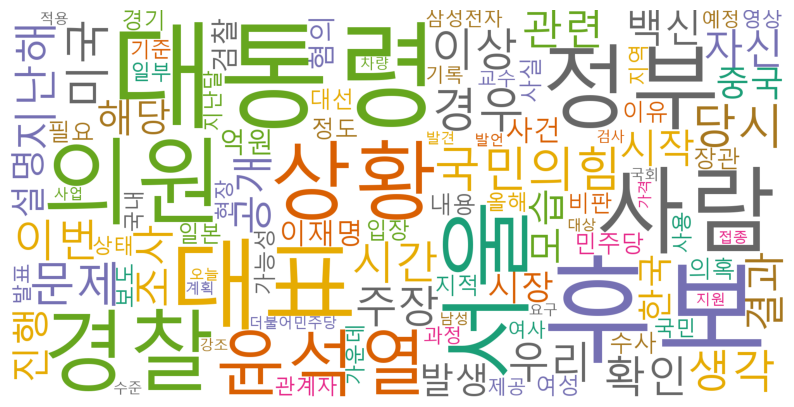

In [96]:
# 워드클라우드 생성
wc = WordCloud(font_path='malgun',width=2000, height=1000,background_color='white',colormap='Dark2',random_state=2)
wc.generate_from_frequencies(*r4)

fig=plt.figure()
fig.set_size_inches(10,10)

plt.axis('off')
plt.imshow(wc)
plt.savefig('C:/marketing/wc/result1.png')

---

In [13]:
    text = df['Contents']
    text_filtered = text.str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]"," ")

    tokenized_data_filtered=[]
    for j in text_filtered:
        temp = tagger.nouns(j)
        temp = [word for word in temp if len(word)>1]  ## 두글자 이상이면 포함, 리스트 함축
        temp = [word for word in temp if word not in stopwords]
        tokenized_data_filtered.append(temp)

    tokens=[]
    for k in tokenized_data_filtered:
        tokens.extend(k)

    num_top_tokens=100

    counted_tokens=Counter(tokens)
    top_keywords=dict(counted_tokens.most_common(num_top_tokens))
    tk_df = pd.DataFrame(list(top_keywords.items()), columns=['keywords','freq'])
    tk_df.to_csv('C:/marketing/data3/tk_df' + str(idx) + '.csv', encoding = 'utf-8-sig')
    print('='*30)

idx = 1173
Done


C:\Users\inven\AppData\Local\Temp\ipykernel_12808\1206865840.py:28: FutureWarning: The default value of regex will change from True to False in a future version.
  text_filtered = text.str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]"," ")


idx = 1174
Done
idx = 1175


C:\Users\inven\AppData\Local\Temp\ipykernel_12808\1206865840.py:28: FutureWarning: The default value of regex will change from True to False in a future version.
  text_filtered = text.str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]"," ")


Done


C:\Users\inven\AppData\Local\Temp\ipykernel_12808\1206865840.py:28: FutureWarning: The default value of regex will change from True to False in a future version.
  text_filtered = text.str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]"," ")


idx = 1176
Done
idx = 1177


C:\Users\inven\AppData\Local\Temp\ipykernel_12808\1206865840.py:28: FutureWarning: The default value of regex will change from True to False in a future version.
  text_filtered = text.str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]"," ")


Done


C:\Users\inven\AppData\Local\Temp\ipykernel_12808\1206865840.py:28: FutureWarning: The default value of regex will change from True to False in a future version.
  text_filtered = text.str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]"," ")


idx = 1178
Done


C:\Users\inven\AppData\Local\Temp\ipykernel_12808\1206865840.py:28: FutureWarning: The default value of regex will change from True to False in a future version.
  text_filtered = text.str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]"," ")


idx = 1179
Done


C:\Users\inven\AppData\Local\Temp\ipykernel_12808\1206865840.py:28: FutureWarning: The default value of regex will change from True to False in a future version.
  text_filtered = text.str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]"," ")


idx = 1180
Done


C:\Users\inven\AppData\Local\Temp\ipykernel_12808\1206865840.py:28: FutureWarning: The default value of regex will change from True to False in a future version.
  text_filtered = text.str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]"," ")


idx = 1181
Done


C:\Users\inven\AppData\Local\Temp\ipykernel_12808\1206865840.py:28: FutureWarning: The default value of regex will change from True to False in a future version.
  text_filtered = text.str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]"," ")


idx = 1182
Done


C:\Users\inven\AppData\Local\Temp\ipykernel_12808\1206865840.py:28: FutureWarning: The default value of regex will change from True to False in a future version.
  text_filtered = text.str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]"," ")


idx = 1183
Done


C:\Users\inven\AppData\Local\Temp\ipykernel_12808\1206865840.py:28: FutureWarning: The default value of regex will change from True to False in a future version.
  text_filtered = text.str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]"," ")


idx = 1184
Done


C:\Users\inven\AppData\Local\Temp\ipykernel_12808\1206865840.py:28: FutureWarning: The default value of regex will change from True to False in a future version.
  text_filtered = text.str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]"," ")


idx = 1185
Done


C:\Users\inven\AppData\Local\Temp\ipykernel_12808\1206865840.py:28: FutureWarning: The default value of regex will change from True to False in a future version.
  text_filtered = text.str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]"," ")


idx = 1186
Done


C:\Users\inven\AppData\Local\Temp\ipykernel_12808\1206865840.py:28: FutureWarning: The default value of regex will change from True to False in a future version.
  text_filtered = text.str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]"," ")


idx = 1187
Done


C:\Users\inven\AppData\Local\Temp\ipykernel_12808\1206865840.py:28: FutureWarning: The default value of regex will change from True to False in a future version.
  text_filtered = text.str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]"," ")


idx = 1188
Done


C:\Users\inven\AppData\Local\Temp\ipykernel_12808\1206865840.py:28: FutureWarning: The default value of regex will change from True to False in a future version.
  text_filtered = text.str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]"," ")


idx = 1189
Done


C:\Users\inven\AppData\Local\Temp\ipykernel_12808\1206865840.py:28: FutureWarning: The default value of regex will change from True to False in a future version.
  text_filtered = text.str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]"," ")


idx = 1190
Done


C:\Users\inven\AppData\Local\Temp\ipykernel_12808\1206865840.py:28: FutureWarning: The default value of regex will change from True to False in a future version.
  text_filtered = text.str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]"," ")


idx = 1191
Done


C:\Users\inven\AppData\Local\Temp\ipykernel_12808\1206865840.py:28: FutureWarning: The default value of regex will change from True to False in a future version.
  text_filtered = text.str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]"," ")


idx = 1192
Done


C:\Users\inven\AppData\Local\Temp\ipykernel_12808\1206865840.py:28: FutureWarning: The default value of regex will change from True to False in a future version.
  text_filtered = text.str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]"," ")


idx = 1193
Done


C:\Users\inven\AppData\Local\Temp\ipykernel_12808\1206865840.py:28: FutureWarning: The default value of regex will change from True to False in a future version.
  text_filtered = text.str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]"," ")


idx = 1194
Done


C:\Users\inven\AppData\Local\Temp\ipykernel_12808\1206865840.py:28: FutureWarning: The default value of regex will change from True to False in a future version.
  text_filtered = text.str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]"," ")


idx = 1195
Done


C:\Users\inven\AppData\Local\Temp\ipykernel_12808\1206865840.py:28: FutureWarning: The default value of regex will change from True to False in a future version.
  text_filtered = text.str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]"," ")


idx = 1196
Done


C:\Users\inven\AppData\Local\Temp\ipykernel_12808\1206865840.py:28: FutureWarning: The default value of regex will change from True to False in a future version.
  text_filtered = text.str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]"," ")


idx = 1197
Done


C:\Users\inven\AppData\Local\Temp\ipykernel_12808\1206865840.py:28: FutureWarning: The default value of regex will change from True to False in a future version.
  text_filtered = text.str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]"," ")


idx = 1198
Done


C:\Users\inven\AppData\Local\Temp\ipykernel_12808\1206865840.py:28: FutureWarning: The default value of regex will change from True to False in a future version.
  text_filtered = text.str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]"," ")


idx = 1199
Done


C:\Users\inven\AppData\Local\Temp\ipykernel_12808\1206865840.py:28: FutureWarning: The default value of regex will change from True to False in a future version.
  text_filtered = text.str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]"," ")


idx = 1200
Done


C:\Users\inven\AppData\Local\Temp\ipykernel_12808\1206865840.py:28: FutureWarning: The default value of regex will change from True to False in a future version.
  text_filtered = text.str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]"," ")


idx = 1201
Done


C:\Users\inven\AppData\Local\Temp\ipykernel_12808\1206865840.py:28: FutureWarning: The default value of regex will change from True to False in a future version.
  text_filtered = text.str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]"," ")


idx = 1202
Done


C:\Users\inven\AppData\Local\Temp\ipykernel_12808\1206865840.py:28: FutureWarning: The default value of regex will change from True to False in a future version.
  text_filtered = text.str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]"," ")


idx = 1203
Done


C:\Users\inven\AppData\Local\Temp\ipykernel_12808\1206865840.py:28: FutureWarning: The default value of regex will change from True to False in a future version.
  text_filtered = text.str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]"," ")


idx = 1204
Done


C:\Users\inven\AppData\Local\Temp\ipykernel_12808\1206865840.py:28: FutureWarning: The default value of regex will change from True to False in a future version.
  text_filtered = text.str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]"," ")


idx = 1205
Done


C:\Users\inven\AppData\Local\Temp\ipykernel_12808\1206865840.py:28: FutureWarning: The default value of regex will change from True to False in a future version.
  text_filtered = text.str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]"," ")


idx = 1206
Done


C:\Users\inven\AppData\Local\Temp\ipykernel_12808\1206865840.py:28: FutureWarning: The default value of regex will change from True to False in a future version.
  text_filtered = text.str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]"," ")


idx = 1207
Done


C:\Users\inven\AppData\Local\Temp\ipykernel_12808\1206865840.py:28: FutureWarning: The default value of regex will change from True to False in a future version.
  text_filtered = text.str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]"," ")


idx = 1208
Done


C:\Users\inven\AppData\Local\Temp\ipykernel_12808\1206865840.py:28: FutureWarning: The default value of regex will change from True to False in a future version.
  text_filtered = text.str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]"," ")


idx = 1209
Done


C:\Users\inven\AppData\Local\Temp\ipykernel_12808\1206865840.py:28: FutureWarning: The default value of regex will change from True to False in a future version.
  text_filtered = text.str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]"," ")


idx = 1210
Done


C:\Users\inven\AppData\Local\Temp\ipykernel_12808\1206865840.py:28: FutureWarning: The default value of regex will change from True to False in a future version.
  text_filtered = text.str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]"," ")


idx = 1211
Done


C:\Users\inven\AppData\Local\Temp\ipykernel_12808\1206865840.py:28: FutureWarning: The default value of regex will change from True to False in a future version.
  text_filtered = text.str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]"," ")


idx = 1212
Done


C:\Users\inven\AppData\Local\Temp\ipykernel_12808\1206865840.py:28: FutureWarning: The default value of regex will change from True to False in a future version.
  text_filtered = text.str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]"," ")


idx = 1213
Done


C:\Users\inven\AppData\Local\Temp\ipykernel_12808\1206865840.py:28: FutureWarning: The default value of regex will change from True to False in a future version.
  text_filtered = text.str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]"," ")


idx = 1214
Done


C:\Users\inven\AppData\Local\Temp\ipykernel_12808\1206865840.py:28: FutureWarning: The default value of regex will change from True to False in a future version.
  text_filtered = text.str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]"," ")


idx = 1215
Done


C:\Users\inven\AppData\Local\Temp\ipykernel_12808\1206865840.py:28: FutureWarning: The default value of regex will change from True to False in a future version.
  text_filtered = text.str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]"," ")


idx = 1216
Done


C:\Users\inven\AppData\Local\Temp\ipykernel_12808\1206865840.py:28: FutureWarning: The default value of regex will change from True to False in a future version.
  text_filtered = text.str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]"," ")


idx = 1217
Done


C:\Users\inven\AppData\Local\Temp\ipykernel_12808\1206865840.py:28: FutureWarning: The default value of regex will change from True to False in a future version.
  text_filtered = text.str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]"," ")


idx = 1218
Done


C:\Users\inven\AppData\Local\Temp\ipykernel_12808\1206865840.py:28: FutureWarning: The default value of regex will change from True to False in a future version.
  text_filtered = text.str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]"," ")


idx = 1219
Done


C:\Users\inven\AppData\Local\Temp\ipykernel_12808\1206865840.py:28: FutureWarning: The default value of regex will change from True to False in a future version.
  text_filtered = text.str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]"," ")


idx = 1220
Done


C:\Users\inven\AppData\Local\Temp\ipykernel_12808\1206865840.py:28: FutureWarning: The default value of regex will change from True to False in a future version.
  text_filtered = text.str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]"," ")


idx = 1221
Done


C:\Users\inven\AppData\Local\Temp\ipykernel_12808\1206865840.py:28: FutureWarning: The default value of regex will change from True to False in a future version.
  text_filtered = text.str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]"," ")


idx = 1222
Done


C:\Users\inven\AppData\Local\Temp\ipykernel_12808\1206865840.py:28: FutureWarning: The default value of regex will change from True to False in a future version.
  text_filtered = text.str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]"," ")


idx = 1223
Done


C:\Users\inven\AppData\Local\Temp\ipykernel_12808\1206865840.py:28: FutureWarning: The default value of regex will change from True to False in a future version.
  text_filtered = text.str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]"," ")


idx = 1224
Done


C:\Users\inven\AppData\Local\Temp\ipykernel_12808\1206865840.py:28: FutureWarning: The default value of regex will change from True to False in a future version.
  text_filtered = text.str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]"," ")


idx = 1225
Done


C:\Users\inven\AppData\Local\Temp\ipykernel_12808\1206865840.py:28: FutureWarning: The default value of regex will change from True to False in a future version.
  text_filtered = text.str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]"," ")


idx = 1226
Done


C:\Users\inven\AppData\Local\Temp\ipykernel_12808\1206865840.py:28: FutureWarning: The default value of regex will change from True to False in a future version.
  text_filtered = text.str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]"," ")


idx = 1227
Done


C:\Users\inven\AppData\Local\Temp\ipykernel_12808\1206865840.py:28: FutureWarning: The default value of regex will change from True to False in a future version.
  text_filtered = text.str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]"," ")


idx = 1228
Done


C:\Users\inven\AppData\Local\Temp\ipykernel_12808\1206865840.py:28: FutureWarning: The default value of regex will change from True to False in a future version.
  text_filtered = text.str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]"," ")


idx = 1229
Done


C:\Users\inven\AppData\Local\Temp\ipykernel_12808\1206865840.py:28: FutureWarning: The default value of regex will change from True to False in a future version.
  text_filtered = text.str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]"," ")


idx = 1230
Done


C:\Users\inven\AppData\Local\Temp\ipykernel_12808\1206865840.py:28: FutureWarning: The default value of regex will change from True to False in a future version.
  text_filtered = text.str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]"," ")


idx = 1231
Done


C:\Users\inven\AppData\Local\Temp\ipykernel_12808\1206865840.py:28: FutureWarning: The default value of regex will change from True to False in a future version.
  text_filtered = text.str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]"," ")


idx = 1232
Done


C:\Users\inven\AppData\Local\Temp\ipykernel_12808\1206865840.py:28: FutureWarning: The default value of regex will change from True to False in a future version.
  text_filtered = text.str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]"," ")


KeyboardInterrupt: 

In [55]:
print('y') if body == None else print('n')

y


In [58]:
error4

[1, 0]

In [52]:
news_url[125:]

[(125, 'https://n.news.naver.com/article/003/0010362184?ntype=RANKING'),
 (126, 'https://n.news.naver.com/article/003/0010361990?ntype=RANKING'),
 (127, 'https://n.news.naver.com/article/003/0010364539?ntype=RANKING'),
 (128, 'https://n.news.naver.com/article/003/0010362293?ntype=RANKING'),
 (129, 'https://n.news.naver.com/article/003/0010363683?ntype=RANKING'),
 (130, 'https://n.news.naver.com/article/006/0000106872?ntype=RANKING'),
 (131, 'https://n.news.naver.com/article/006/0000106869?ntype=RANKING'),
 (132, 'https://n.news.naver.com/article/006/0000106852?ntype=RANKING'),
 (133, 'https://n.news.naver.com/article/006/0000106862?ntype=RANKING'),
 (134, 'https://n.news.naver.com/article/006/0000106853?ntype=RANKING'),
 (135, 'https://n.news.naver.com/article/047/0002303486?ntype=RANKING'),
 (136, 'https://n.news.naver.com/article/047/0002303543?ntype=RANKING'),
 (137, 'https://n.news.naver.com/article/047/0002303453?ntype=RANKING'),
 (138, 'https://n.news.naver.com/article/047/000230

In [ ]:
print("error4 =", len(error4))
retry4 = [error4[i] for i in range(len(error4)) if error4[i][0] == 0]
print(len(retry4))
print("="*25)
print(retry4)

In [ ]:
sum_er = 0
for i in range(len(error4)):
    sum_er += error4[i][1]
print(sum_er)

---

In [ ]:
key_df = pd.DataFrame()
total = 0
for i in range(len(news_url)):
    print("i =", i)
    tk2_df = pd.read_csv("C:/marketing/data2/tk_df" + str(i) + ".csv", encoding="utf-8-sig")
    print(len(tk2_df))
    total += len(tk2_df)
    key_df = key_df.append(tk2_df, ignore_index = True)

In [ ]:
r2 = key_df.groupby('keywords')['freq'].sum()
r2

In [ ]:
r3 = r2.sort_values(ascending = False)[:100]
r3

In [ ]:
r4 = r3.T.to_dict()
r4

In [ ]:
wc = WordCloud(font_path='malgun',width=2000, height=1000,background_color='white',colormap='Dark2',random_state=2)
wc.generate_from_frequencies(r4)

fig=plt.figure()
fig.set_size_inches(10,10)

plt.axis('off')
plt.imshow(wc)
plt.savefig('C:/marketing/wc/result1.png')